<a href="https://colab.research.google.com/github/rokmr/Deep-Learning-In-Computer-Vision/blob/main/ViT/ViT_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install -q transformers datasets

Image Processor - resize, rescale, etc.

In [ ]:
from transformers import ViTImageProcessor, ViTModel, ViTConfig 
import torch
from datasets import load_dataset

#ViT

In [ ]:
#Loading Model and Model Configuration
configuration = ViTConfig()
model_1 = ViTModel(configuration)
configuration = model_1.config

In [ ]:
model_1

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(

#[Pretrained ViT](https://huggingface.co/google/vit-base-patch16-224-in21k)



In [ ]:
%%capture
#loading pretrained ViT
feature_extractor_2 = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model_2 = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

In [ ]:
model_2

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(

#[Fine-Tuned ViT](https://huggingface.co/google/vit-base-patch16-224)

In [ ]:
%%capture
from transformers import ViTFeatureExtractor, ViTForImageClassification
feature_extractor_3 = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model_3 = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")


In [ ]:
model_3

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

******
**model_2 is trained version of model_1 on imagenet 21k**

**model_3 is fine tuned version of model_2 on imagenet 1k**

**model_1 and model_2 does not have a classifier at output stage**

**model_3 have classifier for 1k at the output stage**
******

#Datasets

In [ ]:
#loading datasets
dataset =  load_dataset('cifar10');

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [ ]:
cifar10_id2label={0: "airplane",
                  1: "automobile",
                  2: "bird",
                  3: "cat",
                  4: "deer",
                  5: "dog",
                  6: "frog",
                  7: "horse",
                  8: "ship",
                  9: "truck"}

In [ ]:
image0 = dataset["test"]["img"][0]
image1 = dataset["test"]["img"][11]
image2 = dataset["test"]["img"][12]

label0 = dataset["test"]["label"][0]
label1 = dataset["test"]["label"][11]
label2 = dataset["test"]["label"][12]

In [ ]:
label0, label1, label2

(3, 9, 7)

In [ ]:
cifar10_id2label[label0], cifar10_id2label[label1], cifar10_id2label[label2]

('cat', 'truck', 'dog')

# Using ViT

In [ ]:
OUTPUT = []
img = [image0, image1, image2]
label = [label0, label1, label2]
for image in img:
  inputs = feature_extractor_3(image, return_tensors='pt')
  with torch.no_grad():
    pred = model_3(**inputs).logits
    output = pred.argmax(-1).item()
    OUTPUT.append(output)
    print(output)

281
675
156


In [ ]:
for output in OUTPUT:
  print(model_3.config.id2label[output])  

tabby, tabby cat
moving van
Blenheim spaniel


**Blenheim spaniel is a species of a dog**


# ViT With Gradio

In [ ]:
%%capture
!pip install gradio

In [ ]:
import gradio as gr
gr.Interface.load("huggingface/google/vit-base-patch16-224",
                  theme="default",
                  example="duck.png",
                  css=".footer{display:none !important}",
                  title=None).launch(share=True)

In [ ]:
import gradio as gr
gr.Interface.load("huggingface/google/vit-base-patch16-224",
                  theme="default",
                  css=".footer{display:none !important}",
                  title="Vision Transformer").launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:94: UserWarning: gr.Interface.load() will be deprecated. Use gr.load() instead.
  warnings.warn("gr.Interface.load() will be deprecated. Use gr.load() instead.")


Fetching model from: https://huggingface.co/google/vit-base-patch16-224
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://758a940b45cea2ebbc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


**Following output occur while passing beer_bottle.jpeg from datasets folder**

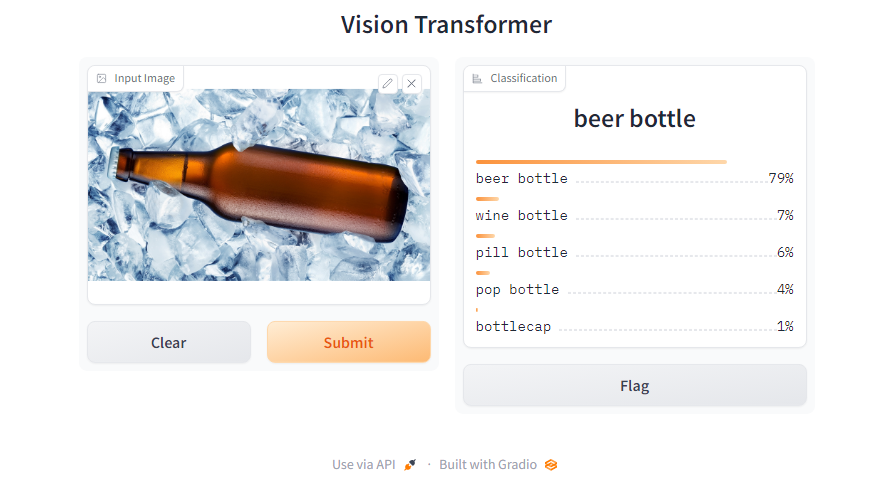